Description of Variables:

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman&#39;s rating of her marriage (1 = very poor, 5 =
very good)

age: woman&#39;s age

yrs_married: number of years married

children: number of children

religious: woman&#39;s rating of how religious she is (1 = not religious,
4 =strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school,
20= advanced degree)

occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = &quot;white collar&quot;, 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband&#39;s occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [1]:
import numpy as np
import pandas as pd
#using pandas.tseries instead of statsmodels.api
import statsmodels.api as sm
import pandas.tseries as pdt
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()

In [2]:
#  add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [5]:
X.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [6]:
y

array([1., 1., 1., ..., 0., 0., 0.])

array([[<Axes: title={'center': 'rate_marriage'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'yrs_married'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'religious'}>,
        <Axes: title={'center': 'educ'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'occupation_husb'}>,
        <Axes: title={'center': 'affairs'}>],
       [<Axes: title={'center': 'affair'}>, <Axes: >, <Axes: >]],
      dtype=object)

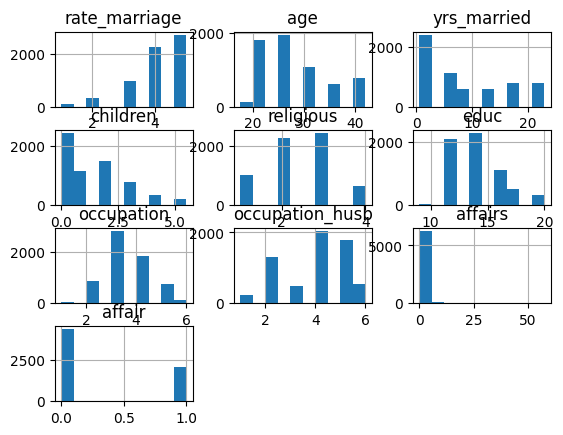

In [7]:
dta.hist()

In [8]:
print("Model Evaluation Using a Validation Set")
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Model Evaluation Using a Validation Set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [9]:
#We will use the statsmodels Logit function for logistic regression
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.538031
         Iterations 6


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Sep 2023   Pseudo R-squ.:                  0.1443
Time:                        17:49:25   Log-Likelihood:                -2397.5
converged:                       True   LL-Null:                       -2801.6
Covariance Type:            nonrobust   LLR p-value:                1.071e-161
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.3423      0.650      5.144      0.000       2.069       4.616
occ_2             0.3924      0.496      0.791      0.429      -0.579       1.364
occ_3             0.7035      0.488      1.442      0.149      -0.253       1.660
occ_4             0.3934      0.490      0.802      0.422      -0.567       1.354
occ_5             0.9981      0.495      2.014      0.044       0.027       1.969
occ_6             0.9368      0.566      1.654      0.098      -0.173       2.047
occ_husb_2       -0.0348      0.212     -0.164      0.869      -0.450       0.380
occ_husb_3        0.0430      0.233      0.184      0.854      -0.414       0.500
occ_husb_4       -0.0382      0.205     -0.186      0.852      -0.441       0.364
occ_husb_5       -0.0814      0.208     -0.392      0.695      -0.489       0.326
occ_husb_6       -0.1385      0.237     -0.584      0.559      -0.603       0.326
rate_marriage    -0.7472      0.038    -19.504      0.000      -0.822      -0.672
age              -0.0605      0.012     -4.873      0.000      -0.085      -0.036
yrs_married       0.1084      0.013      8.202      0.000       0.083       0.134
children          0.0195      0.039      0.503      0.615      -0.056       0.096
religious        -0.3701      0.042     -8.775      0.000      -0.453      -0.287
educ             -0.0027      0.021     -0.129      0.897      -0.044       0.038
=================================================================================
"""

In [11]:
predictions = result.predict(X_test)
predictions

2700    0.098601
442     0.233797
2261    0.136980
2686    0.336494
4901    0.062733
          ...   
1332    0.489072
1878    0.413433
2020    0.664015
2431    0.178414
5608    0.890911
Length: 1910, dtype: float64

In [14]:
dta.groupby('affair').mean()
# Women who has affairs have rated their marriage less compare to not having affair.

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [15]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [16]:
dta.groupby('occupation_husb').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,affairs,affair
occupation_husb,,,,,,,,,
1.0,4.318777,23.862445,3.449782,0.353712,2.327511,14.991266,3.445415,0.657557,0.209607
2.0,4.035933,28.310398,8.530581,1.400229,2.443425,13.521407,3.130734,0.763874,0.325688
3.0,4.034694,29.358163,9.212245,1.369388,2.451020,13.812245,3.244898,0.809943,0.353061
4.0,4.114286,28.592611,8.678325,1.380049,2.415271,14.109852,3.393596,0.717594,0.314778
5.0,4.114671,30.243114,10.090219,1.521079,2.426082,14.358628,3.577853,0.615542,0.338392
6.0,4.235849,30.973585,10.046226,1.512264,2.445283,15.822642,3.905660,0.739709,0.311321


Text(0, 0.5, 'Frequency')

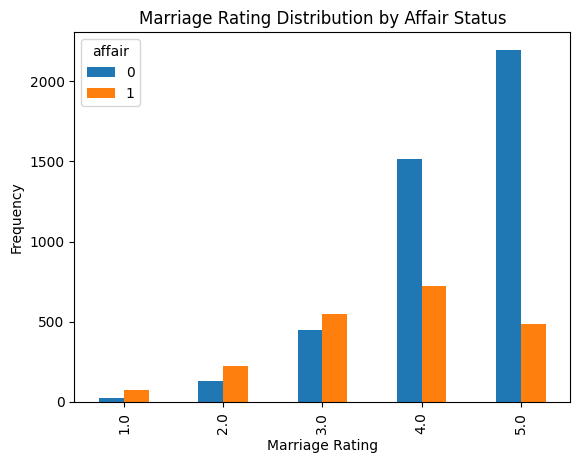

In [17]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

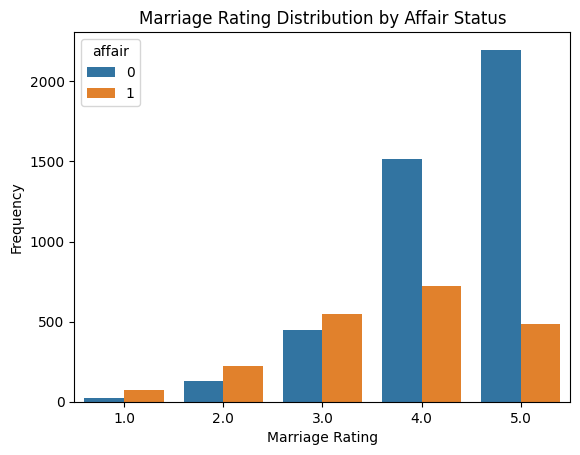

In [19]:
import seaborn as sns
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

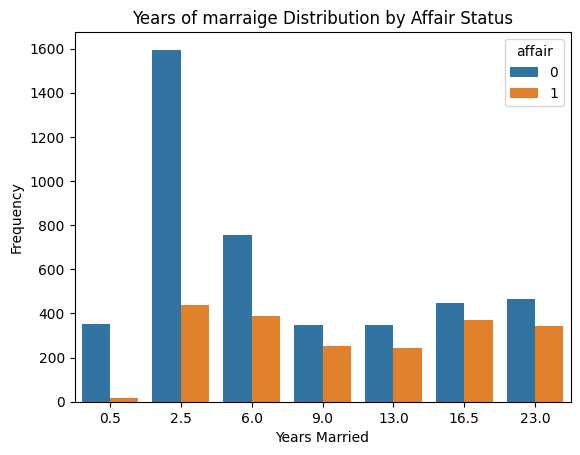

In [20]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

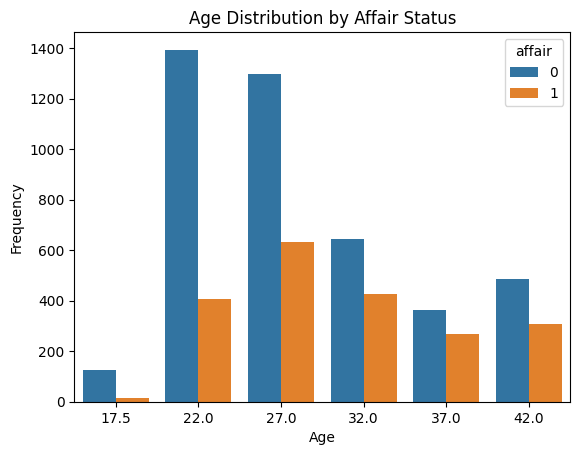

In [21]:
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [22]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
print(model.score(X_train,y_train))
print("Training set has 73% accuracy")

0.7302513464991023
Training set has 73% accuracy


In [24]:
print("Use the test data set to predict the class / labels")
# predict class labels for the test set
predicted = model.predict(X_test)
predicted

Use the test data set to predict the class / labels


array([0., 0., 0., ..., 1., 0., 1.])

In [25]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs

array([[0.90502047, 0.09497953],
       [0.76498723, 0.23501277],
       [0.86199942, 0.13800058],
       ...,
       [0.32044926, 0.67955074],
       [0.82578373, 0.17421627],
       [0.10389084, 0.89610916]])

In [29]:
print('Evaluating the model')
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print("The accuracy of the model is 71% nearer to the training data.")

Evaluating the model
0.7115183246073299
0.7327061462494229
The accuracy of the model is 71% nearer to the training data.


In [32]:
!pip install scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

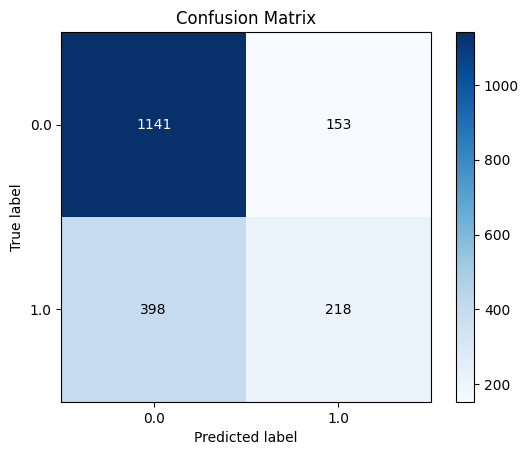

In [33]:
#Using confusion matrix to describe the performance of the classification mo
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predicted)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

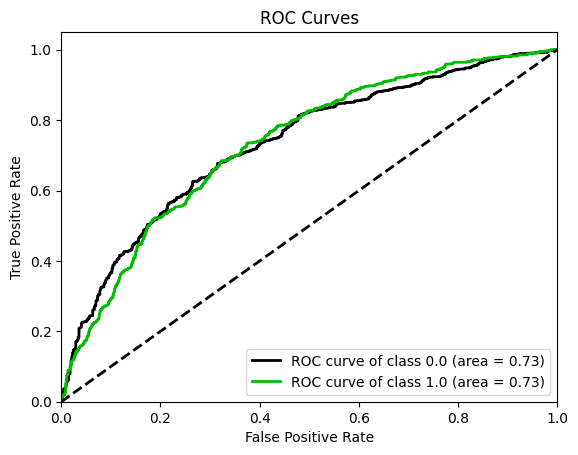

In [34]:
# Plotting the true positive rate (TPR) against the false positive rate (FPR)
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])


In [35]:
#accuracy report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81      1294
         1.0       0.59      0.35      0.44       616

    accuracy                           0.71      1910
   macro avg       0.66      0.62      0.62      1910
weighted avg       0.69      0.71      0.69      1910



In [36]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)

numpy.ndarray

In [37]:
cf.shape

(2, 2)

In [38]:
#Calculation of Precision Recall and F1 score
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.5876010781671159 , Recall : 0.3538961038961039, F1 : 0.4417426545086119


In [39]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.3538961038961039, False Positive Rate : 0.11823802163833076


In [41]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.71899529, 0.69858713, 0.73783359, 0.70800628, 0.71428571,
        0.72841444, 0.72955975, 0.70440252, 0.74685535, 0.75      ]),
 0.7236940059042485)

In [43]:
print('Predicting the Probability of an Affair')
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]])))
print('The predicted probability of an affair is 23%')

Predicting the Probability of an Affair
[[0.76335699 0.23664301]]
The predicted probability of an affair is 23%


In [45]:
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 3, 1, 4,16]])))
print('The predicted probability of an affair is 18%')

[[0.81124059 0.18875941]]
The predicted probability of an affair is 18%
